# Business Understanding
Motivation behind this project includes answer to following questions:

•	What is the overall diversity profile of the organization?

•	What are our best recruiting sources if we want to ensure a diverse organization?

•	Are there areas of the company where pay is not equitable?



In [57]:
#Importing the necessary libraries for data analysis and machine learning modeling.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#Setting the maximum number of columns to display in Pandas dataframes.

pd.pandas.set_option('display.max_columns', None)

#Setting the style of Seaborn plots to "darkgrid".

sns.set(style="darkgrid")

#Filtering out warning messages to improve code readability.

warnings.filterwarnings("ignore")

#Importing machine learning algorithms from Scikit-Learn.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

#  Data Understanding

In [5]:
# Read Data
df = pd.read_csv('HRDataset_v14.csv')


In [7]:
#Displaying the first 10 rows of a Pandas dataframe using the .head() function
df.head(10)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,0,19,Production Technician I,MA,1844,05/22/77,F,Single,US Citizen,No,White,1/9/2012,NaN,N/A-StillEmployed,Active,Production,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,0,24,Software Engineer,MA,2110,05/24/79,F,Single,US Citizen,No,White,11/10/2014,NaN,N/A-StillEmployed,Active,Software Engineering,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,0,19,Production Technician I,MA,2199,02/18/83,M,Widowed,US Citizen,No,White,9/30/2013,NaN,N/A-StillEmployed,Active,Production,Ketsia Liebig,19.0,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0,19
8,"Bachiochi, Linda",10114,0,0,0,3,5,3,1,47837,0,19,Production Technician I,MA,1902,02/11/70,F,Single,US Citizen,No,Black or African American,7/6/2009,NaN,N/A-StillEmployed,Active,Production,Brannon Miller,12.0,Diversity Job Fair,Fully Meets,4.46,3,0,1/25/2019,0,4
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,0,14,IT Support,MA,1886,01/07/88,M,Divorced,US Citizen,No,White,1/5/2015,NaN,N/A-StillEmployed,Active,IT/IS,Peter Monroe,7.0,Indeed,Fully Meets,5.00,5,6,2/18/2019,0,16


# What is the overall diversity profile of the organization?


In [22]:
#Calculating the frequency count of the 'Sex' column in a Pandas dataframe and storing it in the variable 'GendDis'
GendDis = df['Sex'].value_counts()
GendDis

F     176
M     135
Name: Sex, dtype: int64

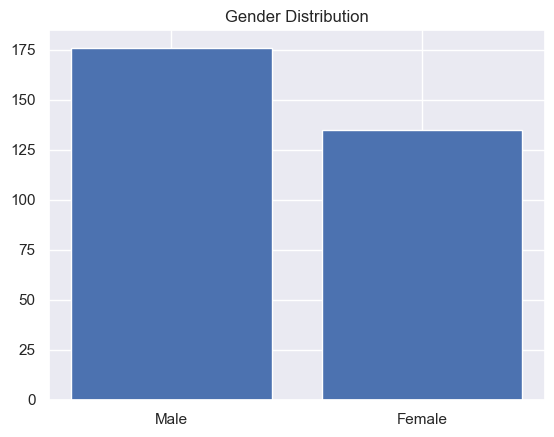

In [24]:
#Creating a bar plot using Matplotlib to visualize the gender distribution stored in the 'GendDis' variable
plt.bar(['Male','Female'], GendDis)

#Adding a title to the plot
plt.title("Gender Distribution")

#Displaying the plot
plt.show()

In [19]:
#Calculating the frequency count of the 'MaritalDesc' column in a Pandas dataframe and storing it in the variable 'EmpStat'
EmpStat = df['MaritalDesc'].value_counts()
EmpStat

Single       137
Married      124
Divorced      30
Separated     12
Widowed        8
Name: MaritalDesc, dtype: int64

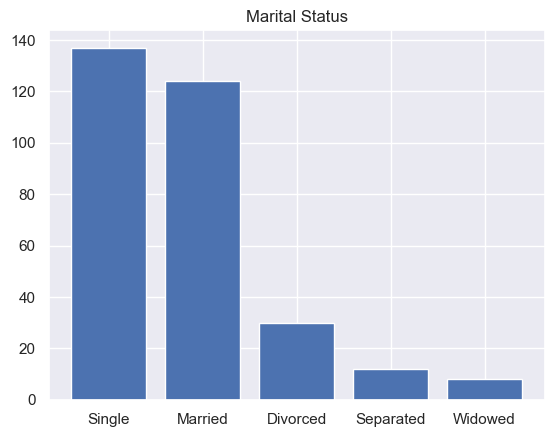

In [21]:
#Creating a bar plot using Matplotlib to visualize the Marital Status stored in the 'EmpStat' variable
plt.bar(['Single','Married','Divorced','Separated', 'Widowed'], EmpStat)

#Adding a title to the plot
plt.title("Marital Status")

#Displaying the plot
plt.show()

In [26]:
#Calculating the frequency count of the 'RaceDesc' column in a Pandas dataframe and storing it in the variable 'RaceDesc'
RaceDesc = df['RaceDesc'].value_counts()
RaceDesc

White                               187
Black or African American            80
Asian                                29
Two or more races                    11
American Indian or Alaska Native      3
Hispanic                              1
Name: RaceDesc, dtype: int64

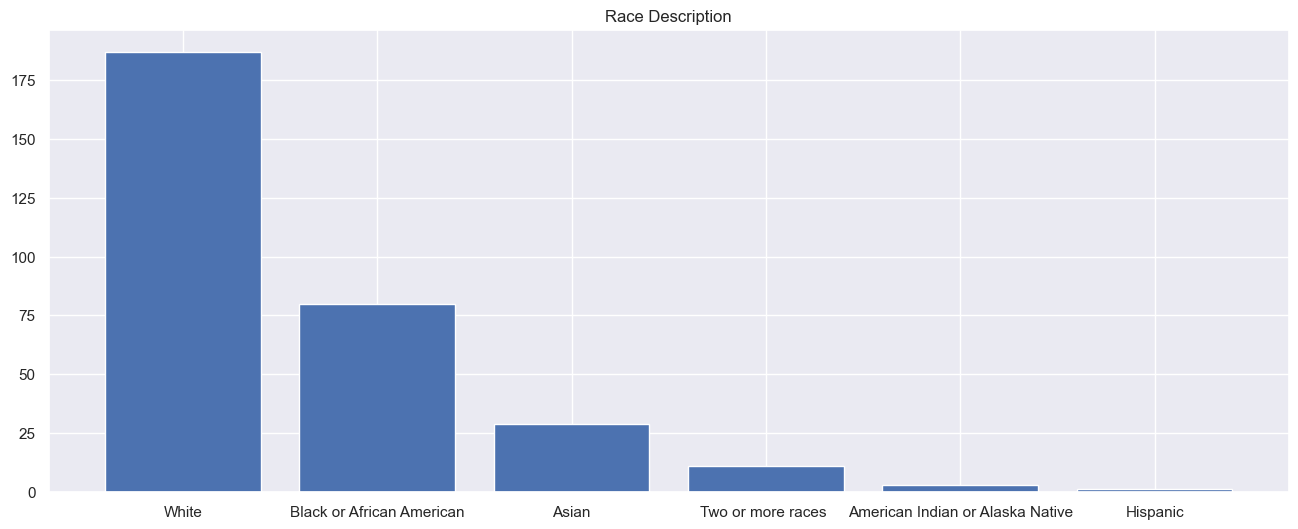

In [45]:
#Creating a bar plot using Matplotlib to visualize the Race Description stored in the 'RaceDesc' variable
fig, ax = plt.subplots(figsize=(16, 6))
plt.bar(['White','Black or African American', 'Asian', 'Two or more races ', 'American Indian or Alaska Native'
        ,'Hispanic'], RaceDesc)

#Adding a title to the plot
plt.title("Race Description")

#Displaying the plot
plt.show()

# What are our best recruiting sources if we want to ensure a diverse organization?

In [51]:
#This line of code groups the 'PerformanceScore' column by 'RecruitmentSource' and counts the frequency of each unique value.
#The resulting output is transformed into a new DataFrame where the values in 'PerformanceScore' are columns and
#the values in 'RecruitmentSource' are row indices, creating an easy comparison of performance scores across sources.

The DataFrame is assigned to 'hr_source'
hr_source = df.groupby('RecruitmentSource').PerformanceScore.value_counts().unstack()

<Axes: xlabel='Exceeds', ylabel='RecruitmentSource'>

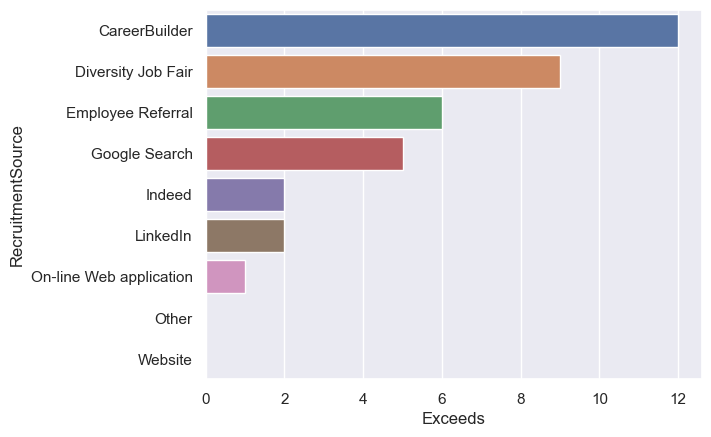

In [48]:
#Displaying the plot

sns.barplot(data = hr_source.sort_values('Exceeds', ascending = False),
            x = 'Exceeds', y =  hr_source.index)

<Axes: xlabel='Fully Meets', ylabel='RecruitmentSource'>

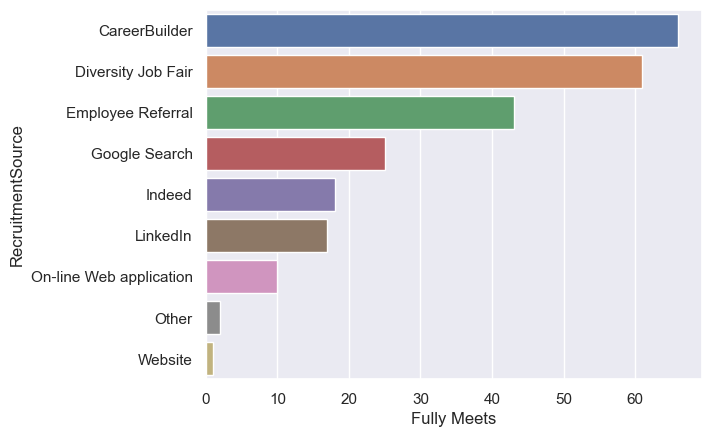

In [49]:
#Displaying the plot

sns.barplot(data = hr_source.sort_values('Fully Meets', ascending = False),
            x = 'Fully Meets', y =  hr_source.index)

# Are there areas of the company where pay is not equitable?

In [52]:
# group the DataFrame by sex and calculate the sum of salaries
total_salary_by_sex = df.groupby("Sex")["Salary"].sum()
total_salary_by_sex

Sex
F     11930464
M      9534969
Name: Salary, dtype: int64

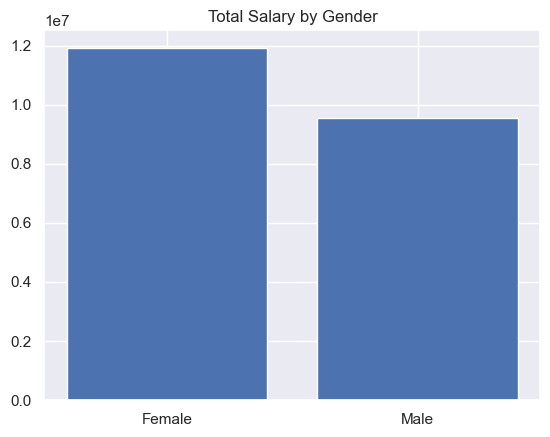

In [54]:
#Creating a bar plot using Matplotlib to visualize the Total Salary by Gender stored in the 'total_salary_by_sex' variable
plt.bar(['Female','Male'], total_salary_by_sex)

#Adding a title to the plot
plt.title("Total Salary by Gender")

#Displaying the plot
plt.show()

# Train models and Measure Performance To Predict the Employee Termination

In [55]:
 def encode_dates(df, columns_with_prefixes):
    df = df.copy()
    
    for column, prefix in columns_with_prefixes:
        df[column] = pd.to_datetime(df[column])
        
        df[prefix + '_year'] = df[column].apply(lambda x: x.year)
        df[prefix + '_month'] = df[column].apply(lambda x: x.month)
        df[prefix + '_day'] = df[column].apply(lambda x: x.day)
        
        df = df.drop(column, axis=1)
        
    return df

def ordinal_encode(df, columns_with_orderings):
    df = df.copy()
    
    for column, ordering in columns_with_orderings:
        df[column] = df[column].apply(lambda x: ordering.index(x))
        
    return df

def onehot_encode(df, columns_with_prefixes):
    df = df.copy()
    
    for column, prefix in columns_with_prefixes:
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    
    return df

In [56]:
def preprocess_inputs(df, scaler):
    df = df.copy()
    
    # Drop unneeded columns
    df = df.drop(['Employee_Name', 'EmpID', 'MaritalStatusID', 'Sex', 'PositionID', 'DeptID', 'PerfScoreID', 'EmpStatusID', 'EmploymentStatus', 'DateofTermination', 'TermReason', 'ManagerID'], axis=1)
    ''
    # Date encoding
    date_columns = [
        ('DOB', "DOB"),
        ('DateofHire', "DOH"),
        ('LastPerformanceReview_Date', "PRD")
    ]
    df = encode_dates(df, columns_with_prefixes=date_columns)
    
    # Ordinal encoding
    ordinal_columns = [
        ('PerformanceScore', ['PIP', 'Needs Improvement', 'Fully Meets', 'Exceeds'])
    ]
    df = ordinal_encode(df, columns_with_orderings=ordinal_columns)
    
    # One-hot encoding
    nominal_columns = [
        ('Position', "PS"),
        ('State', "ST"),
        ('Zip', "ZP"),
        ('MaritalDesc', "MD"),
        ('CitizenDesc', "CD"),
        ('HispanicLatino', "HL"),
        ('RaceDesc', "RD"),
        ('Department', "DE"),
        ('ManagerName', "MN"),
        ('RecruitmentSource', "RS")
    ]
    df = onehot_encode(df, columns_with_prefixes=nominal_columns)
    
    # Split df into X and y
    y = df['Termd'].copy()
    X = df.drop('Termd', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)
    
    # Scale X
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)
    
    return X_train, X_test, y_train, y_test

In [58]:
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = preprocess_inputs(df, scaler)

In [59]:
#train models
models = {
    "   K-Nearest Neighbors": KNeighborsClassifier(),
    "   Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "         Decision Tree": DecisionTreeClassifier(),
    "        Neural Network": MLPClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

   K-Nearest Neighbors trained.
   Logistic Regression trained.
Support Vector Machine trained.
         Decision Tree trained.
        Neural Network trained.


In [60]:
#print the results
for name, model in models.items():
    print(name + " Accuracy: {:.2f}%".format(model.score(X_test, y_test) * 100))

   K-Nearest Neighbors Accuracy: 77.66%
   Logistic Regression Accuracy: 90.43%
Support Vector Machine Accuracy: 90.43%
         Decision Tree Accuracy: 98.94%
        Neural Network Accuracy: 82.98%
